
# Decision Trees and Random Forests in Python


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

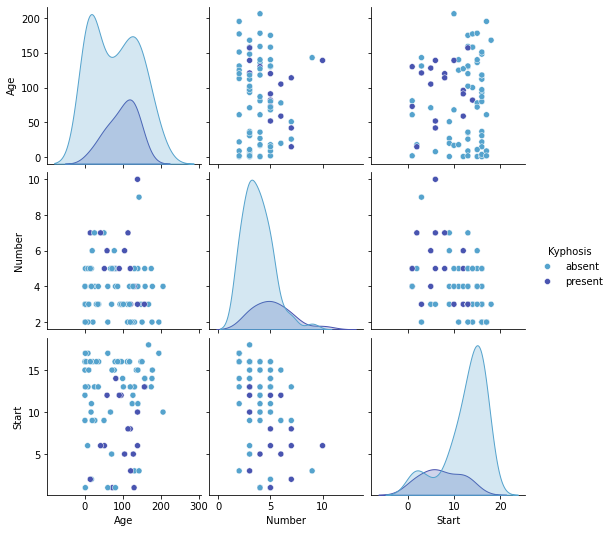

In [4]:
sns.set_palette('icefire')
sns.pairplot(df,hue='Kyphosis')

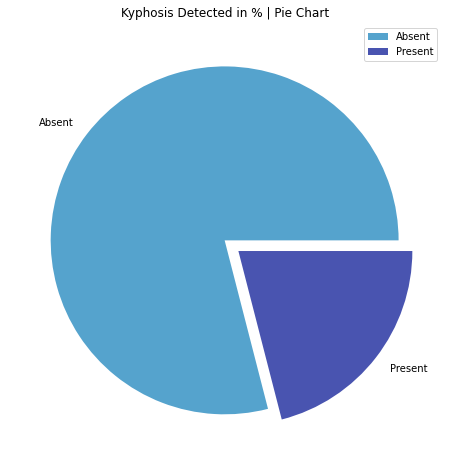

In [5]:
exp=[0,0.1]
plt.figure(figsize=(10,8))
plt.pie(round((df['Kyphosis'].value_counts()/len(df))*100,2),explode=exp,labels=['Absent','Present'])
plt.title('Kyphosis Detected in % | Pie Chart')
plt.legend()
plt.show()

## Train Test Split

Let's split up the data into a training set and a test set!

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

## Decision Trees

We'll start just by training a single decision tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from tqdm import tqdm

# Load data
df_kyphosis = pd.read_csv('kyphosis.csv')

# Prepare the data
X = df_kyphosis.drop('Kyphosis', axis=1)
y = df_kyphosis['Kyphosis'].apply(lambda x: 1 if x == 'present' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(5, 21, 5)),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None] + list(range(5, 21, 5)),
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],
    'min_impurity_split': [0.0, 0.1, 0.2, 0.3]
}

# Calculate total number of parameter combinations
total_combinations = len(param_grid['criterion']) * len(param_grid['splitter']) * len(param_grid['max_depth']) * \
                     len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * \
                     len(param_grid['max_features']) * len(param_grid['max_leaf_nodes']) * \
                     len(param_grid['min_impurity_decrease']) * len(param_grid['min_impurity_split'])

# Initialize tqdm progress bar
pbar = tqdm(total=total_combinations, desc="Grid Search Progress")

# Perform grid search
for criterion in param_grid['criterion']:
    for splitter in param_grid['splitter']:
        for max_depth in param_grid['max_depth']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    for max_features in param_grid['max_features']:
                        for max_leaf_nodes in param_grid['max_leaf_nodes']:
                            for min_impurity_decrease in param_grid['min_impurity_decrease']:
                                for min_impurity_split in param_grid['min_impurity_split']:
                                    # Update progress bar
                                    pbar.update(1)
                                    
                                    # Set parameters for current iteration
                                    clf.set_params(criterion=criterion, splitter=splitter, max_depth=max_depth,
                                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                                   max_features=max_features, max_leaf_nodes=max_leaf_nodes,
                                                   min_impurity_decrease=min_impurity_decrease,
                                                   min_impurity_split=min_impurity_split)
                                    
                                    # Fit the classifier and perform cross-validation
                                    clf.fit(X_train, y_train)
                                    
# Close the progress bar
pbar.close()

# Print the best parameters
best_params = clf.get_params()
print('Best parameters found:\n', best_params)

# Train the best estimator on the training data
best_clf = clf
best_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = best_clf.predict(X_test)

In [32]:
# Print classification report
print(classification_report(y_test, y_pred))

Grid Search Progress: 100%|███████████████████████████████████████████████████| 102400/102400 [02:46<00:00, 616.02it/s]

Best parameters found:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.3, 'min_impurity_split': 0.3, 'min_samples_leaf': 8, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       0.00      0.00      0.00         6

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier()

# Create the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50],
    'max_depth': [None, 2,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print('Best parameters found for Random Forest:\n', best_params_rf)

# Train the best estimator on the training data
best_rf_clf = grid_search_rf.best_estimator_
best_rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = best_rf_clf.predict(X_test)

<IPython.core.display.Javascript object>

Best parameters found for Random Forest:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [16]:
from sklearn.metrics import classification_report,confusion_matrix

# Print classification report for Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

      absent       0.68      1.00      0.81        17
     present       0.00      0.00      0.00         8

    accuracy                           0.68        25
   macro avg       0.34      0.50      0.40        25
weighted avg       0.46      0.68      0.55        25



c:\users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(confusion_matrix(y_test,y_pred_rf))

[[17  0]
 [ 6  2]]


In [27]:
pred=np.zeros(25)
y_test=y_test.apply(lambda x : 1 if x == 'present' else 0)

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       0.00      0.00      0.00         8

    accuracy                           0.68        25
   macro avg       0.34      0.50      0.40        25
weighted avg       0.46      0.68      0.55        25



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [13]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [14]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

NameError: name 'StringIO' is not defined

## Random Forests

Now let's compare the decision tree model to a random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
print(classification_report(y_test,rfc_pred))

# Great Job!